# 1. Introduction

[Cropbox](https://github.com/tomyun/Cropbox.jl) is a modeling framework we're building in our research group to support development of crop models.

In [1]:
using Cropbox

## Example

Let's build a model representing logistic growth of plant biomass.

### 1. Math

$$
\begin{align}
\frac{dW}{dt} &= rW(1-\frac{W}{W_f}) \\
W_{t = 0} &= W_0
\end{align}
$$

| Symbol | Value | Units | Description |
| :- | :- | :- | :- |
| $r$ | ? | ? | Relative (or specific or intrinsic) growth rate |
| $W_f$ | ? | ? | Potential final mass of a plant |
| $W_0$ | ? | ? | Seed mass or initial biomass |
| $W$ | - | ? | Whole-plant biomass as dry matter (state variable) |
| $t$ | - | ? | Time unit used in the model |

### 2. Word

A **system** consists of variables including,
 - **r** (growth rate) which is a parameter *preserved* throughout simulation,
 - **Wf** (final biomass) which is also a parameter,
 - **W0** (initial biomass) which is another parameter,
 - **W** (biomass) which is a state variable with initial value **W0** and *integrates* over
 - **t** (time).

### 3. Code

In [2]:
@system Growth(Controller) begin
    r: growth_rate ~ preserve(parameter)
    Wf: final_biomass ~ preserve(parameter)
    W0: initial_biomass ~ preserve(parameter)

    W(W, r, Wf): biomass => begin
        r * W * (1 - W / Wf)
    end ~ accumulate(init = W0)

    t(nounit(context.clock.tick)): time ~ track
end

Growth

## Workthrough

### 1. Simulation

We've just declared our first model but it's still incomplete since no parameter values are assigned yet. Here are some values we're going to use in this example. Let's not think too much about the units for now.

| Symbol | Value | Units | Description |
| :- | :- | :- | :- |
| $r$ | 0.05 | $\%$? | Relative (or specific or intrinsic) growth rate |
| $W_f$ | 300 | $\mathrm{g}$? | Potential final mass of a plant |
| $W_0$ | 0.25 | $\mathrm{g}$? | Seed mass or initial biomass |
| $W$ | - | $\mathrm{g}$? | Whole-plant biomass as dry matter (state variable) |
| $t$ | - | ? | Time unit used in the model |

Then we can declare our model once again with all necessary parameters included.

In [3]:
@system Growth(Controller) begin
    r: growth_rate => 0.05 ~ preserve(parameter)
    Wf: final_biomass => 300 ~ preserve(parameter)
    W0: initial_biomass => 0.25 ~ preserve(parameter)

    W(W, r, Wf): biomass => begin
        r * W * (1 - W / Wf)
    end ~ accumulate(init = W0)

    t(nounit(context.clock.tick)): time ~ track
end

Growth

Now it's time to run our first simulation by calling `simulate()` function with the model we created. Let's run it for 300 time steps which may be equivalent to 300 days according to our parameter table.

In [4]:
r = simulate(Growth; stop = 300)

Progress: 100%[=========================================] Time: 0:00:01


,tick,r,Wf,W0,W,t
,Quantit…,Float64,Float64,Float64,Float64,Float64
1,0.0 hr,0.05,300.0,0.25,0.25,0.0
2,1.0 hr,0.05,300.0,0.25,0.26249,1.0
3,2.0 hr,0.05,300.0,0.25,0.275603,2.0
4,3.0 hr,0.05,300.0,0.25,0.28937,3.0
5,4.0 hr,0.05,300.0,0.25,0.303825,4.0
6,5.0 hr,0.05,300.0,0.25,0.319,5.0
7,6.0 hr,0.05,300.0,0.25,0.334934,6.0
8,7.0 hr,0.05,300.0,0.25,0.351661,7.0
9,8.0 hr,0.05,300.0,0.25,0.369224,8.0


The results are in a data frame which can be conveniently plotted.

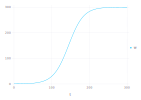

In [5]:
plot(r, :t, :W; kind = :line)

### 2. Units

Now, let's be more explicit about the units. In Cropbox, each variable can be tagged with a unit as backed by [Unitful.jl](https://github.com/PainterQubits/Unitful.jl).

| Symbol | Value | Units | Description |
| :- | :- | :- | :- |
| $r$ | 0.05 | $\mathrm{g}$ $\mathrm{g^{-1}}$ $\mathrm{d^{-1}}$ | Relative (or specific or intrinsic) growth rate |
| $W_f$ | 300 | $\mathrm{g}$ | Potential final mass of a plant |
| $W_0$ | 0.25 | $\mathrm{g}$ | Seed mass or initial biomass |
| $W$ | - | $\mathrm{g}$ | Whole-plant biomass as dry matter (state variable) |
| $t$ | - | $\mathrm{d}$ | Time unit used in the model |

In [6]:
@system Growth(Controller) begin
    r: growth_rate => 0.05 ~ preserve(u"g/g/d", parameter)
    Wf: final_biomass => 300 ~ preserve(u"g", parameter)
    W0: initial_biomass => 0.25 ~ preserve(u"g", parameter)

    W(W, r, Wf): biomass => begin
        r * W * (1 - W / Wf)
    end ~ accumulate(u"g", init = W0)

    t(context.clock.tick): time ~ track(u"d")
end

Growth

In [7]:
stop = 300u"d"

300 d

In [8]:
r = simulate(Growth; stop);

Progress: 100%[=========================================] Time: 0:00:01


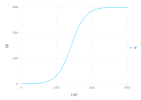

In [9]:
plot(r, :t, :W, kind = :line)

#### Validation with Units

Explicit units specified in the model are not just cosmetic. Presence of units often plays a critical role in catching up a coding mistake or sometimes a logic error in the equation. In the example below, we forgot `Wf` in the caculation of `W`, leading to an incompatible unit which got caught up during runtime.

In [10]:
@system Growth(Controller) begin
    r: growth_rate => 0.05 ~ preserve(u"g/g/d", parameter)
    Wf: final_biomass => 0.3 ~ preserve(u"kg", parameter) # kg instead of g
    W0: initial_biomass => 0.25 ~ preserve(u"g", parameter)

    W(W, r, Wf): biomass => begin
        r * W * (1 - W) # here we forgot Wf
    end ~ accumulate(u"g", init = W0)

    t(context.clock.tick): time ~ track(u"d")
end

Growth

In [11]:
simulate(Growth)

LoadError: DimensionError: 1.0 and 0.25 g are not dimensionally compatible.

#### Automatic conversion of units

Compatible units (*i.e.* sharing same dimension, but in a different scale) are automatically converted as needed. In the example below, we use 0.3 kg instead of 300 g for the final biomass (`Wf`) and get the exactly same result as above.

In [12]:
@system Growth(Controller) begin
    r: growth_rate => 0.05 ~ preserve(u"g/g/d", parameter)
    Wf: final_biomass => 0.3 ~ preserve(u"kg", parameter) # kg instead of g
    W0: initial_biomass => 0.25 ~ preserve(u"g", parameter)

    W(W, r, Wf): biomass => begin
        r * W * (1 - W / Wf)
    end ~ accumulate(u"g", init = W0)

    t(context.clock.tick): time ~ track(u"d")
end

Growth

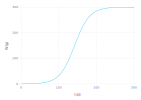

In [13]:
visualize(Growth, :t, :W; stop, kind = :line)

By the way, we can use `visualize()` instead of running `simulate()` first and call `plot()` on the result in two consecutive steps.

### 3. Configurations

In the examples above, we had default paramter values embedded in the model for the sake of simplicity. In practice, it'd be better to have them consolidated into a configuration which can be organized with no tight coupling to the model itself.

In [14]:
@system Growth(Controller) begin
    r: growth_rate ~ preserve(u"g/g/d", parameter)
    Wf: final_biomass ~ preserve(u"g", parameter)
    W0: initial_biomass ~ preserve(u"g", parameter)

    W(W, r, Wf): biomass => begin
        r * W * (1 - W / Wf)
    end ~ accumulate(u"g", init = W0)

    t(context.clock.tick): time ~ track(u"d")
end

Growth

In [15]:
c = @config :Growth => (
    r = 0.05,
    Wf = 300,
    W0 = 0.25,
)

Config for 1 system:
  Growth
    r  = 0.05
    Wf = 300
    W0 = 0.25

In [16]:
r = simulate(Growth; config = c, stop);

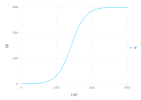

In [17]:
plot(r, :t, :W; kind = :line)

Nice thing about configurations is that they can be easily composed of smaller pieces. We'll see some examples later.

### 4. Interaction

In [18]:
# needed in Docker env
Cropbox.Interact.WebIO.setup(:ijulia)

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-3861040805342613901\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-2226935888242270255\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-3861040805342613901\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [19]:
manipulate(Growth, :t, :W;
    parameters = :Growth => (
        r = 0:0.01:0.2,
        Wf = 100:400,
        W0 = 0.1:0.01:1,
    ),
    stop,
    kind = :line,
    ylim = (0, 400),
)

WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any["Growth"], Dict{Symbol,Any}(:style => Dict{String,Any}("color" => :darkorchid,"font-family" => "monospace"))), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["r"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px","color" => :royalblue)))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 21,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget",:style => Dict("font-family" => "monospace","width" => "25%"))), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 2 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
11, nothing)), Set{String}(), nothing, WebIO.Asset[WebIO.Asset("js", "knockout", "/srv/julia/pkg/packages/Knockout/IP1uR/src/../assets/knockout.js"), WebIO.Asset("js", "knockout_punches", "/srv/julia/pkg/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), WebIO.Asset("js", nothing, "/srv/julia/pkg/packages/InteractBase/sOe2Z/src/../assets/all.js"), WebIO.Asset("css", nothing, "/srv/julia/pkg/packages/InteractBase/sOe2Z/src/../assets/style.css"), WebIO.Asset("css", nothing, "/srv/julia/pkg/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{WebIO.AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007efbc42aba90, Task (runnable) @0x00007efbc42aba90), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n    

### 5. Calibration

In [20]:
obs = Cropbox.DataFrames.DataFrame(t = [100, 200, 300]u"d", W = [20, 250, 400]u"g")

,t,W
,Quantit…,Quantit…
1,100 d,20 g
2,200 d,250 g
3,300 d,400 g


In [21]:
cc = calibrate(Growth, obs;
    index = :t,
    target = :W,
    parameters = :Growth => (
        r = (0, 1),
        Wf = (0, 500),
        W0 = (0, 10),
    ),
    stop,
)

Starting optimization with optimizer BlackBoxOptim.DiffEvoOpt{BlackBoxOptim.FitPopulation{Float64},BlackBoxOptim.RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},BlackBoxOptim.RandomBound{BlackBoxOptim.ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
10.00 secs, 3494 evals, 3383 steps, improv/step: 0.210 (last = 0.2102), fitness=0.602335679

Optimization stopped after 5001 steps and 14.70 seconds
Termination reason: Max number of steps (5000) reached
Steps per second = 340.18
Function evals per second = 347.73
Improvements/step = 0.20220
Total function evaluations = 5112


Best candidate found: [0.0341965, 408.275, 0.692281]

Fitness: 0.068215565



Config for 1 system:
  Growth
    r  = 0.0341965
    Wf = 408.275
    W0 = 0.692281

In [22]:
evaluate(Growth, obs;
    index = :t,
    target = :W,
    config = cc,
    stop,
    metric = :rmse,
)

0.06821556472905463 g

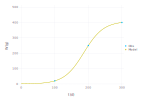

In [23]:
visualize(obs, Growth, :t, :W;
    config = cc,
    stop,
    xlim = (0, 300), ylim = (0, 500),
    name = "Obs", names = ["Model"],
)

## Internals

Let's briefly discuss what actually goes behind the scene. Here is the model we've used.

In [24]:
@system Growth(Controller) begin
    r: growth_rate ~ preserve(u"g/g/d", parameter)
    Wf: final_biomass ~ preserve(u"g", parameter)
    W0: initial_biomass ~ preserve(u"g", parameter)

    W(W, r, Wf): biomass => begin
        r * W * (1 - W / Wf)
    end ~ accumulate(u"g", init = W0)

    t(context.clock.tick): time ~ track(u"d")
end

Growth

We can visualize dependency graph between variables defined in a system.

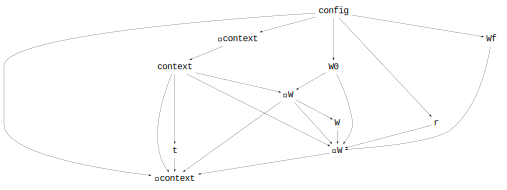

In [25]:
Cropbox.dependency(Growth)

When there is an arrow from `A` to `B`, we say `B` depends on `A`. For example, biomass `W` depends on growth rate `r` as well as initial biomass `W0` and final biomass `Wf`.

Note that there are some auxiliary nodes (prefixed with $\circ$/$\star$) for some variables. Details on how each variable is interpreted are determined by the *pattern*  dictated in the variable declaration. For example, `preserve` variable with `parameter` tag (*e.g.* `W0`, `Wf`) needs to reach out `config` object for reading parameter values. Handling of `accumulate` variable internally requires separate steps for reading value from the previous time step, updating value for the current time step with a rate variable stored in the previous time step, and finally storing the rate variable for the next time step.

By the way, `config` and `context` refer to configuration object and Context system, respectively, and are implicitly included by all other systems.

In [26]:
display("text/plain", Cropbox.dependency(Growth))

[config → W0 → Wf → r → ∘context → context → t → ∘W → W → ⋆W → ⋆context]

Dependency graph is important that it determines an ordering between variables used for generating actual code implementing what model specification describes. Here is a glimpse of the code generated for our model.

In [27]:
@macroexpand @system Growth(Controller) begin
    r: growth_rate ~ preserve(u"g/g/d", parameter)
    Wf: final_biomass ~ preserve(u"g", parameter)
    W0: initial_biomass ~ preserve(u"g", parameter)

    W(W, r, Wf): biomass => begin
        r * W * (1 - W / Wf)
    end ~ accumulate(u"g", init = W0)

    t(context.clock.tick): time ~ track(u"d")
end

quote
    #= /home/Cropbox.jl/src/macro.jl:347 =#
    begin
        $(Expr(:meta, :doc))
        abstract type Growth <: System end
    end
    #= /home/Cropbox.jl/src/macro.jl:348 =#
    begin
        $(Expr(:meta, :doc))
        mutable struct var"##Growth#377" <: Growth
            #= /home/Cropbox.jl/src/macro.jl:349 =#
            context::Cropbox.typefor(Cropbox.Cropbox.Context)
            config::Cropbox.typefor(Cropbox.Cropbox.Config)
            r::Cropbox.typefor(Cropbox.Preserve{Cropbox.valuetype(Float64, (g / g) / d)})
            growth_rate::Cropbox.Preserve{Cropbox.valuetype(Float64, (g / g) / d)}
            Wf::Cropbox.typefor(Cropbox.Preserve{Cropbox.valuetype(Float64, g)})
            final_biomass::Cropbox.Preserve{Cropbox.valuetype(Float64, g)}
            W0::Cropbox.typefor(Cropbox.Preserve{Cropbox.valuetype(Float64, g)})
            initial_biomass::Cropbox.Preserve{Cropbox.valuetype(Float64, g)}
            W::Cropbox.typefor(Cropbox.Accumulate{Cropbox.valuety

Our model was so simple that it consits of a single system. We'll later see more complex models based on multiple systems and how a system can be composed of smaller pieces called mix-ins.

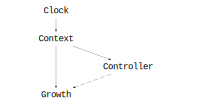

In [28]:
Cropbox.hierarchy(Growth)